In [56]:
# Data from Nathan's spreadsheet -- marked as "not a reliable number"
hw_shoulder = [48.9, 49.1, 1.9]
rr_shoulder = [ 9.5, 45.4, 44.9]

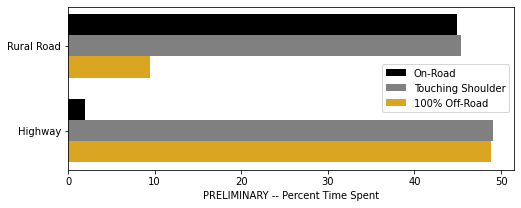

In [57]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Make bar numbers
bar_width = 0.25
x1 = np.arange(2)
x2 = [x + bar_width for x in x1]
x3 = [x + 2*bar_width for x in x1]

# Plot bars
ax.barh(x3, [hw_shoulder[2], rr_shoulder[2]], bar_width, label="On-Road", color="black")
ax.barh(x2, [hw_shoulder[1], rr_shoulder[1]], bar_width, label="Touching Shoulder", color="grey")
ax.barh(x1, [hw_shoulder[0], rr_shoulder[0]], bar_width, label="100% Off-Road", color="goldenrod")

# Labels
ax.legend()
ax.set_yticks(x2)
ax.set_yticklabels(["Highway", "Rural Road"])
ax.set_xlabel("PRELIMINARY -- Percent Time Spent")
fig.set_size_inches(8,3)

In [1]:
rural24 = {
    "Post": {"see": 1659, "touch": 195, "break": 18},
    "Sign": {"see": 2988, "touch": 196, "break": 21},
    "Mailbox": {"see": 804, "touch": 0, "break": 0},
    "Telephone\nPole": {"see": 490, "touch": 3, "break": 0},
    "Cone": {"see": 1, "touch": 0, "break": 0},
    "Drain": {"see": 56, "touch": 1, "break": 0},
    "Guardrail": {"see": 16, "touch": 1, "break": 0},
    "Branches": {"see": 56, "touch": 1, "break": 0},
    "Trash": {"see": 22, "touch": 1, "break": 0},
    "Roadkill": {"see": 6, "touch": 0, "break": 0}
}


highw24 = {
    "Post": {"see": 3643, "touch": 2882, "break": 146},
    "Sign": {"see": 2541, "touch": 182, "break": 17},
    "Mailbox": {"see": 31, "touch": 13, "break": 0},
    "Telephone\nPole": {"see": 405, "touch": 3, "break": 0},
    "Cone": {"see": 363, "touch": 31, "break": 15},
    "Drain": {"see": 41, "touch": 0, "break": 0},
    "Guardrail": {"see": 54, "touch": 0, "break": 0},
    "Branches": {"see": 7, "touch": 1, "break": 0},
    "Trash": {"see": 49, "touch": 1, "break": 3},
    "Roadkill": {"see": 12, "touch": 1, "break": 0}
}


In [2]:
bigbars = []
for obs in rural24:
    if rural24[obs]["see"] >= 100:
        bigbars.append(obs)

smbars = []
for obs in rural24:
    if obs not in bigbars:
        smbars.append(obs)

bigbars = sorted(bigbars, key=lambda x: rural24[x]["see"], reverse=True)
smbars = sorted(smbars, key=lambda x: rural24[x]["see"], reverse=True)

print(f"{bigbars=}\n{smbars=}")

bigbars=['Sign', 'Post', 'Mailbox', 'Telephone\nPole']
smbars=['Drain', 'Branches', 'Trash', 'Guardrail', 'Roadkill', 'Cone']


/home/tjw/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


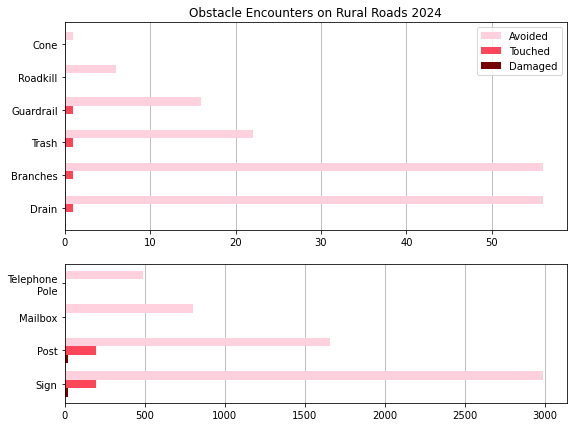

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

bar_width = 0.25
HW_DIST = 1
RR_DIST = 1
fig, ax = plt.subplots(2,1, height_ratios=[len(smbars), len(bigbars)])

xx = np.arange(len(smbars))
ax[0].barh(xx+bar_width, [rural24[i]["see"]/RR_DIST for i in smbars], height=bar_width, label="Avoided", color="xkcd:light pink")
ax[0].barh(xx, [rural24[i]["touch"]/RR_DIST for i in smbars], height=bar_width, label="Touched", color="xkcd:watermelon")
ax[0].barh(xx-bar_width, [rural24[i]["break"]/RR_DIST for i in smbars], height=bar_width, label="Damaged", color="xkcd:blood")
ax[0].set_yticks(xx)
ax[0].set_yticklabels(smbars)
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0].grid(visible=True, which="major", axis="x")
ax[0].set_axisbelow(True)
ax[0].legend()

xx = np.arange(len(bigbars))
ax[1].barh(xx+bar_width, [rural24[i]["see"]/RR_DIST for i in bigbars], height=bar_width, label="Avoided", color="xkcd:light pink")
ax[1].barh(xx, [rural24[i]["touch"]/RR_DIST for i in bigbars], height=bar_width, label="Touched", color="xkcd:watermelon")
ax[1].barh(xx-bar_width, [rural24[i]["break"]/RR_DIST for i in bigbars], height=bar_width, label="Damaged", color="xkcd:blood")
ax[1].set_yticks(xx)
ax[1].set_yticklabels(bigbars)
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[1].grid(visible=True, which="major", axis="x")
ax[1].set_axisbelow(True)

ax[0].set_title("Obstacle Encounters on Rural Roads 2024")
fig.set_size_inches(9, 7)

In [4]:
bigbars = []
for obs in highw24:
    if highw24[obs]["see"] >= 100:
        bigbars.append(obs)

smbars = []
for obs in highw24:
    if obs not in bigbars:
        smbars.append(obs)
        
bigbars = sorted(bigbars, key=lambda x: highw24[x]["see"], reverse=True)
smbars = sorted(smbars, key=lambda x: highw24[x]["see"], reverse=True)

print(f"{bigbars=}\n{smbars=}")

bigbars=['Post', 'Sign', 'Telephone\nPole', 'Cone']
smbars=['Guardrail', 'Trash', 'Drain', 'Mailbox', 'Roadkill', 'Branches']


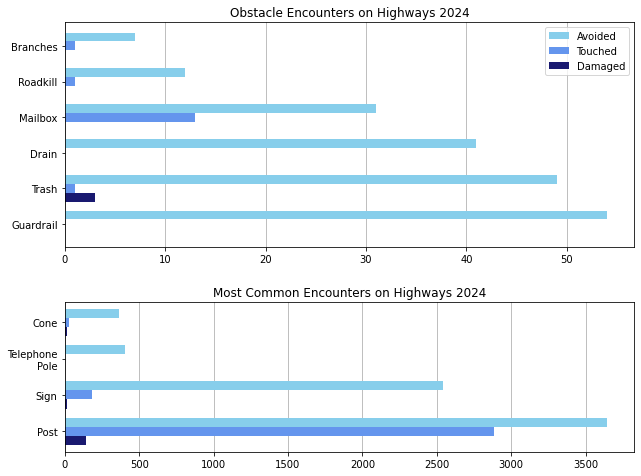

In [5]:
fig, ax = plt.subplots(2,1, height_ratios=[len(smbars), len(bigbars)])
fig.tight_layout(h_pad=1)

xx = np.arange(len(smbars))
ax[0].barh(xx+bar_width, [highw24[i]["see"]/HW_DIST for i in smbars], height=bar_width, label="Avoided", color="skyblue")
ax[0].barh(xx, [highw24[i]["touch"]/HW_DIST for i in smbars], height=bar_width, label="Touched", color="cornflowerblue")
ax[0].barh(xx-bar_width, [highw24[i]["break"]/HW_DIST for i in smbars], height=bar_width, label="Damaged", color="midnightblue")
ax[0].set_yticks(xx)
ax[0].set_yticklabels(smbars)
ax[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0].grid(visible=True, which="major", axis="x")
ax[0].set_axisbelow(True)
ax[0].legend()

xx = np.arange(len(bigbars))
ax[1].barh(xx+bar_width, [highw24[i]["see"]/HW_DIST for i in bigbars], height=bar_width, label="Avoided", color="skyblue")
ax[1].barh(xx, [highw24[i]["touch"]/HW_DIST for i in bigbars], height=bar_width, label="Touched", color="cornflowerblue")
ax[1].barh(xx-bar_width, [highw24[i]["break"]/HW_DIST for i in bigbars], height=bar_width, label="Damaged", color="midnightblue")
ax[1].set_yticks(xx)
ax[1].set_yticklabels(bigbars)
ax[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[1].grid(visible=True, which="major", axis="x")
ax[1].set_axisbelow(True)

ax[0].set_title("Obstacle Encounters on Highways 2024")
ax[1].set_title("Most Common Encounters on Highways 2024")
fig.set_size_inches(9, 7)

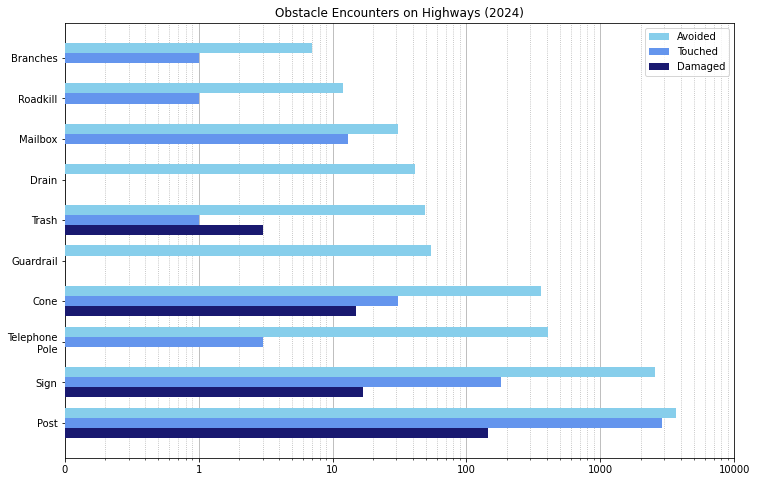

In [ ]:
plt.figure(figsize=(12,8))

smbars = list(highw24.keys())
smbars = sorted(smbars, key=lambda x: highw24[x]["see"], reverse=True)
xx = np.arange(len(smbars))

plt.barh(xx+bar_width, [highw24[i]["see"]/HW_DIST for i in smbars], height=bar_width, label="Avoided", color="skyblue", zorder=10)
plt.barh(xx, [highw24[i]["touch"]/HW_DIST for i in smbars], height=bar_width, label="Touched", color="cornflowerblue", zorder=10)
plt.barh(xx-bar_width, [highw24[i]["break"]/HW_DIST for i in smbars], height=bar_width, label="Damaged", color="midnightblue", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.1] # for the "0" position
b0 = max([highw24[i]["see"]/HW_DIST for i in smbars])
for x in [int(x) for x in plt.xticks()[0]]:
    if x >= 1:
        xt.append(x)
        if x > b0: break
    
plt.xticks(ticks=xt, labels=[f"{x:.0f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Highways (2024)")
plt.show()


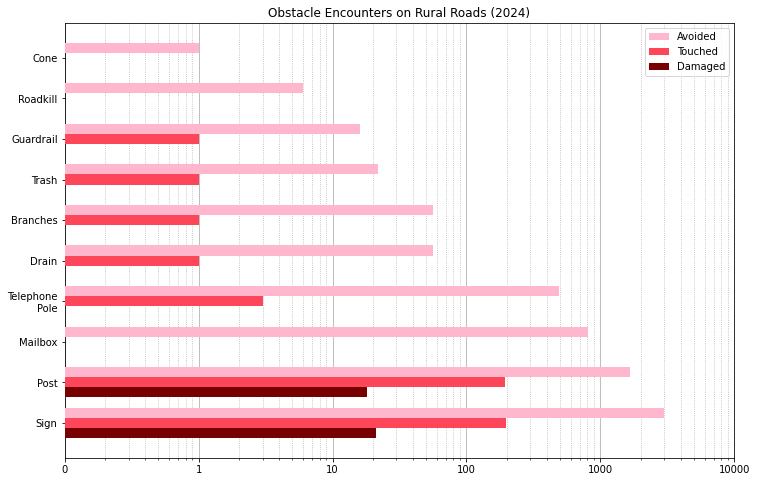

In [14]:
plt.figure(figsize=(12,8))

smbars = list(rural24.keys())
smbars = sorted(smbars, key=lambda x: rural24[x]["see"], reverse=True)
xx = np.arange(len(smbars))

plt.barh(xx+bar_width, [rural24[i]["see"]/RR_DIST for i in smbars], height=bar_width, label="Avoided", color="xkcd:baby pink", zorder=10)
plt.barh(xx, [rural24[i]["touch"]/RR_DIST for i in smbars], height=bar_width, label="Touched", color="xkcd:watermelon", zorder=10)
plt.barh(xx-bar_width, [rural24[i]["break"]/RR_DIST for i in smbars], height=bar_width, label="Damaged", color="xkcd:blood", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.1] # for the "0" position
b0 = max([rural24[i]["see"]/RR_DIST for i in smbars])
for x in [int(x) for x in plt.xticks()[0]]:
    if x >= 1:
        xt.append(x)
        if x > b0: break
    
plt.xticks(ticks=xt, labels=[f"{x:.0f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Rural Roads (2024)")
plt.show()
